## Separating a customer base into different segements

We analyze a wholesale customers dataset with their annual spendings in various product categories. The task is to find the underlying structure in the data to optimize a new delivery method.

### Initial data exploration

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display # Allows the use of display() for DataFrames
np.random.seed(42)
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs
import preprocessing as prep

# Pretty display for notebooks
%matplotlib inline

In [2]:
# We import a dataset with the anual spendings of various customers
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [3]:
# Initial inspection of the data
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
# We select 3 different samples from the dataset and explore their differences
indices = [2, 12, 72]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6353,8808,7684,2405,3516,7844
1,31714,12319,11757,287,3881,2931
2,4420,5139,2661,8872,1321,181


We explore the distributions of the different features and try to find correlations between the features. 

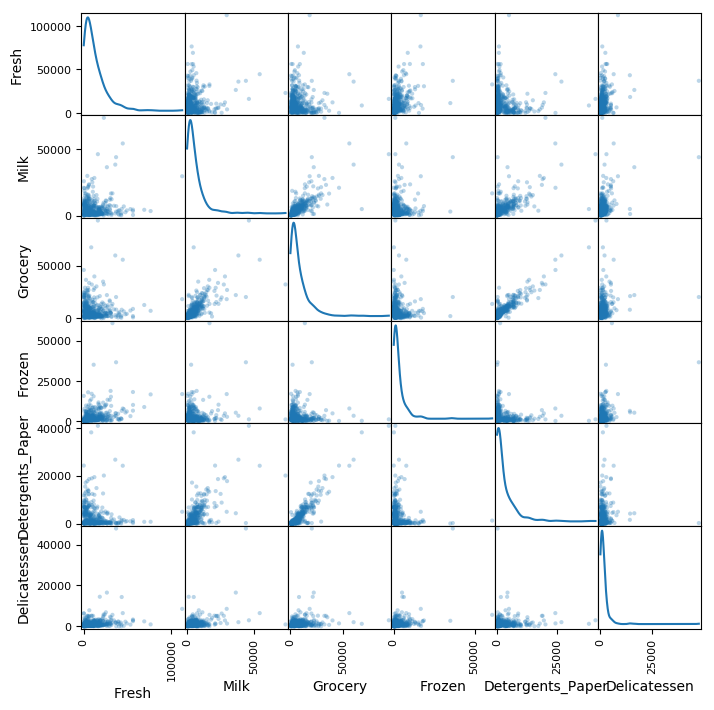

In [5]:
# Plot a scatter matrix for visualizing the correlations between the features
plt.style.use('default')
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (8, 8), diagonal = 'kde')
plt.show()

TODO: Try to analyze the distributions. Are the distributions skewed or are there outliers in the data?

Removed 37 outliers and applied log transformation.


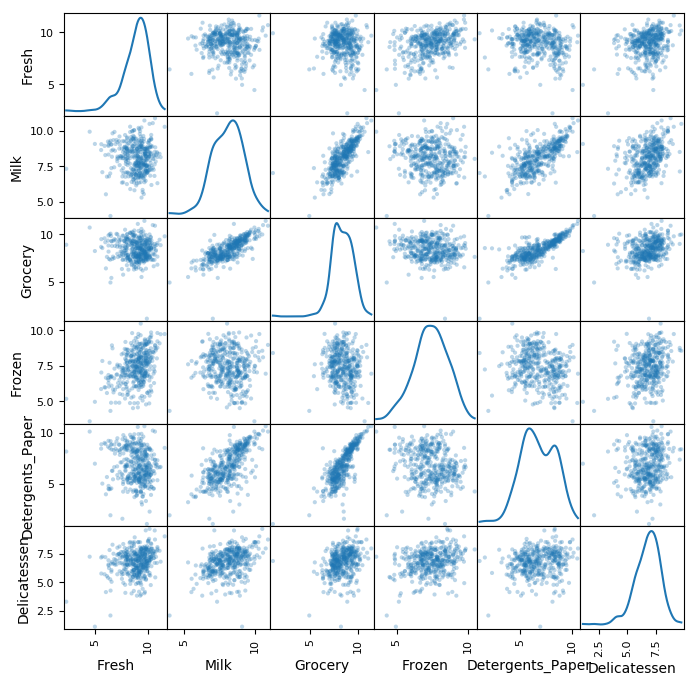

In [6]:
# The distributions are skewed and there are outliers, so we apply some
# preprocessing (log transformation, outlier removal)
data, samples, outliers = prep.preprocess_data(data, samples)

# And display the data again
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (8, 8), diagonal = 'kde')
plt.show()

Now the directions are even more obvious and the distributions are more even. To further inspect the correlation we plot a correlation matrix.

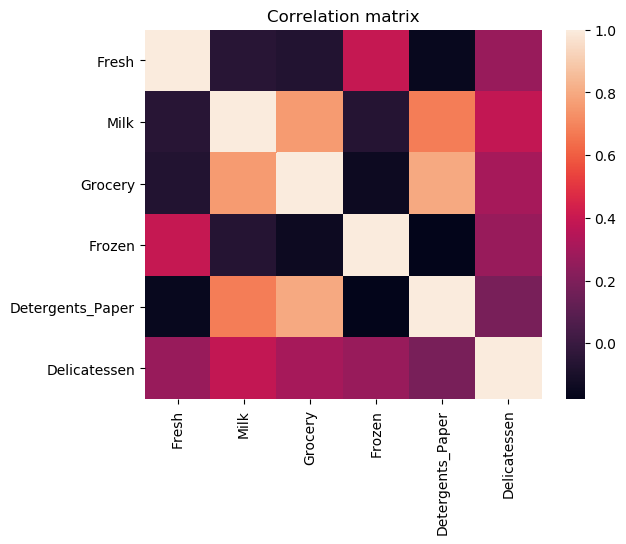

In [7]:
# Plotting the correlations between the features
ax = plt.axes()
sns.heatmap(data.corr(), ax=ax)
ax.set_title('Correlation matrix')
plt.show()

TODO: Did you find any correlations? Can you come up with some customers that would show such a pattern? Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others.

### Explore the main directions of the data (principal component analysis)

Often it is useful to eliminate features that do not add much information to the model and we try to reduce the independent variables. We can do this with principal component analysis. Simplified, principal component analysis is finding the main (principal) directions (components) in the n-dimensional feature vector space. 

#### Begin: PCA Example

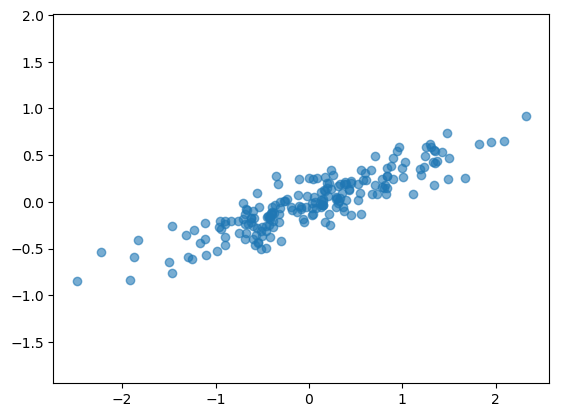

In [8]:
# First we create some random data with a clear direction
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=.6)
plt.axis('equal');

In [9]:
# Then we calculate the first two principal components
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

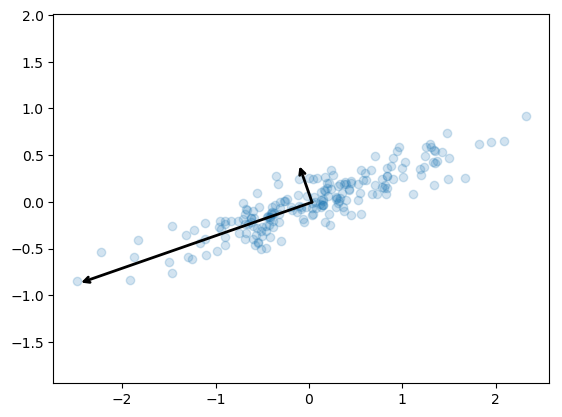

In [10]:
# And display the first two principal components
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

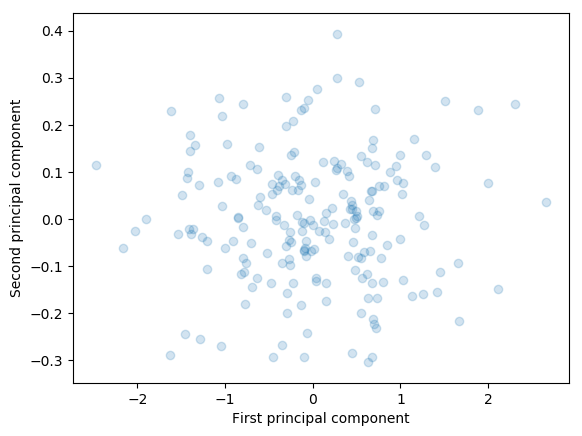

In [11]:
# And now we can transform the data onto these new directions
X_transformed = pca.transform(X)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.2)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

#### End: PCA Example

We explore the first 6 principal components (dimensions) and examine their variance. 

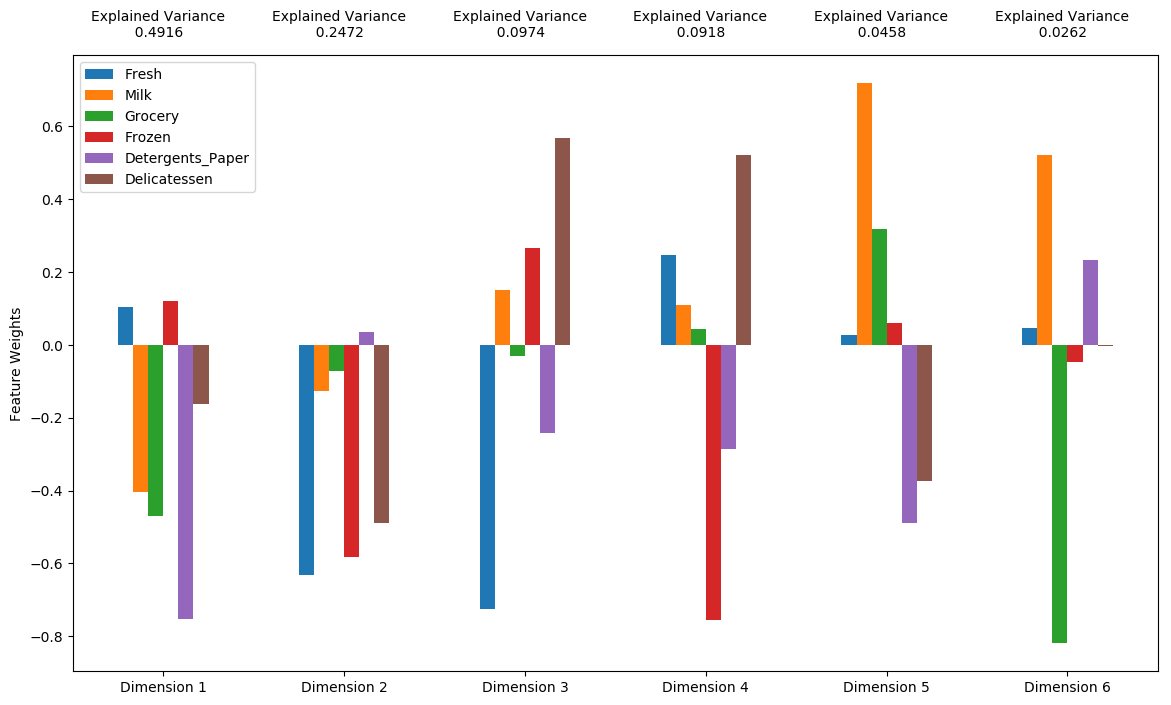

In [12]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=42).fit(data)

# Generate PCA results plot
pca_results = vs.pca_results(data, pca)

### Dimensionality reduction

TODO: How many dimensions are explaning the most variance in the data? We can see that two dimensions are explaining more than 70% of the variance in our data set. In two dimension it is also possible to visualize our data set. Therefore we transform our data onto these two first principal components.

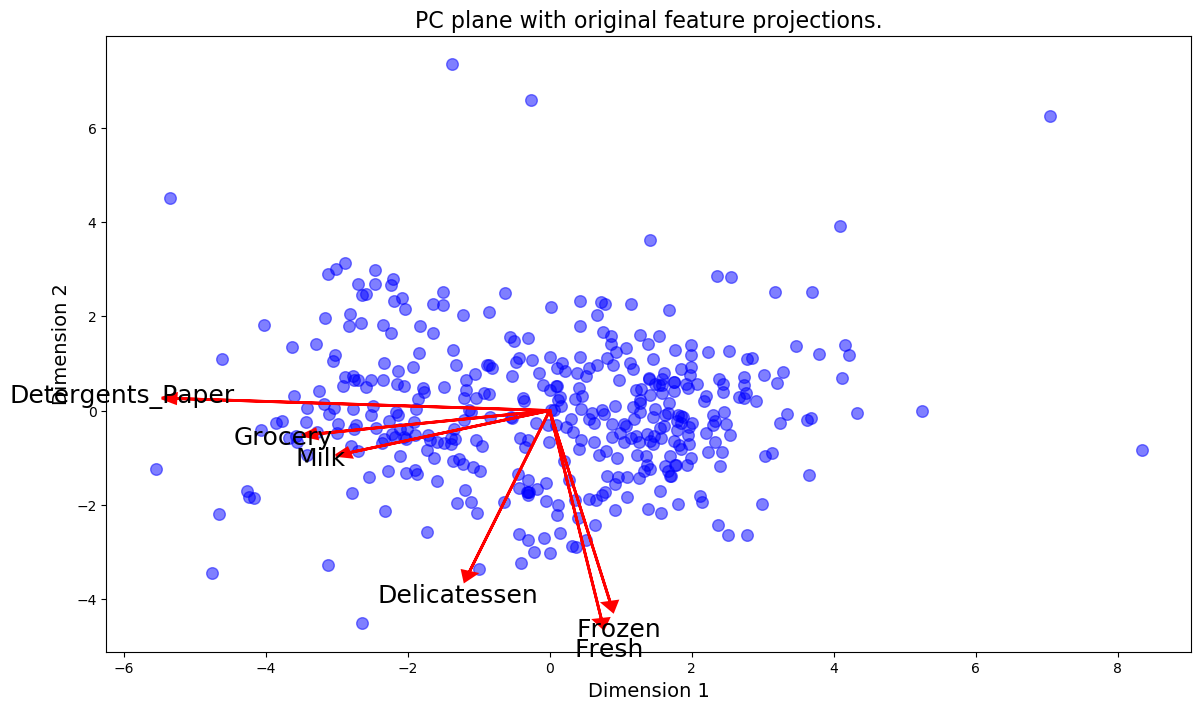

In [13]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=42).fit(data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(data)

# Transform samples as well
reduced_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.biplot(data, reduced_data, pca)

The previous plot show a biplot. A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

### TODO: Determine number of clusters in the data

TODO: With our reduced data we are now able to apply clustering algorithms much more effective and explore the clusters on a 2d plane. Do you see a structure or how would you cluster the data?

TODO: In the following cell you can experiment with various number of clusters by applying a gaussian mixture model (http://scikit-learn.org/stable/modules/mixture.html#gmm) and examining the silhouette score of the clusterings. The silhouette score (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is a performance measure for clustering algorithms. The bigger the number, the smaller the intra cluster distance (1=best, -1=worst).

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Apply your clustering algorithm of choice to the reduced data 
# TODO: Create a GaussianMixture-Model and fit the model to the reuduced_data
# (experiment with different number of clusters)
clusterer = GaussianMixture(n_components=1).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print('Silhouette score: %.3f' % score)

TODO: If you have the number of clusters with the best shilouette score (and solid reasoning) visualize the clusters with the next cell.

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, reduced_samples)

TODO: Now you can compare your clusters with the underlying data structure by executing the next cell.

In [ ]:
vs.channel_results(reduced_data, outliers, reduced_samples)

Congratulation! You have now completed a complete clustering example with:
* Data exploration
* Data preprocessing
* Principal component analysis
* Dimensionality reduction
* Applying a clustering algorithm (Gaussian Mixture Model)